In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import scipy.stats
import scipy.stats as stats
import seaborn as sns
from scipy.stats import friedmanchisquare, norm, probplot, shapiro, wilcoxon
from statsmodels.stats.multitest import multipletests
from tabulate import tabulate
from itertools import combinations
import tabulate
from scipy.stats import friedmanchisquare, wilcoxon, binom_test
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from getdata import DataSlicer


from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier


In [7]:
import IPython





### Design method

### Reseach question

In [10]:


data.describe().T

NameError: name 'data' is not defined

## Distribution of Influence scores

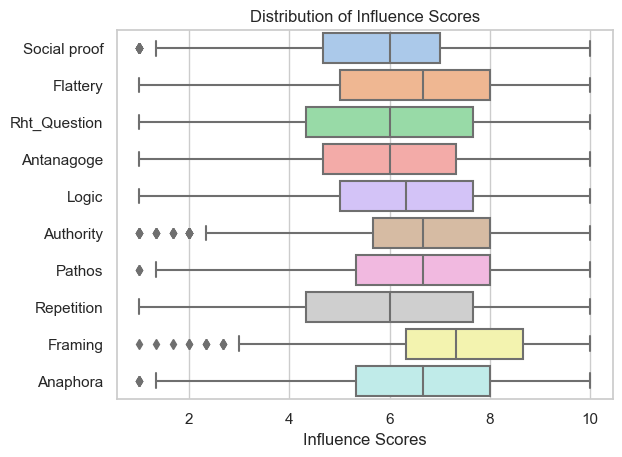

In [4]:
## Distribution of Influence Scores of the Average Persuasion Goal

# Set the style for the plot
sns.set(style='whitegrid')

# Create a boxplot for each technique
sns.boxplot(data=data, orient='h', palette='pastel')

# Add labels and title
plt.xlabel('Influence Scores')
plt.title('Distribution of Influence Scores')
plt.show()

### Shapiro-Wilk test of normality

In [5]:
def shapiro_test(data):
    """
    Perform Shapiro-Wilk test of normality for each column in a pandas DataFrame.

    Parameters:
    data (pandas.DataFrame): Input DataFrame.

    Returns:
    pandas.DataFrame: DataFrame containing the results of the normality tests.
    """
    results = []
    for column in data.columns:
        stat, p = stats.shapiro(data[column])
        if p > 0.05:
            result = [column, stat, p, "Pass"]
        else:
            result = [column, stat, p, "Fail"]
        results.append(result)

    headers = ["Variable", "W-Value", "P-Value", "Normality"]
    return pd.DataFrame(results, columns=headers)


In [6]:

results = shapiro_test(data)
print(tabulate.tabulate(results, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════╤═══════════╤═════════════╤═════════════╕
│    │ Variable     │   W-Value │     P-Value │ Normality   │
╞════╪══════════════╪═══════════╪═════════════╪═════════════╡
│  0 │ Social proof │  0.990488 │ 3.6936e-10  │ Fail        │
├────┼──────────────┼───────────┼─────────────┼─────────────┤
│  1 │ Flattery     │  0.966031 │ 2.85557e-21 │ Fail        │
├────┼──────────────┼───────────┼─────────────┼─────────────┤
│  2 │ Rht_Question │  0.984696 │ 8.7175e-14  │ Fail        │
├────┼──────────────┼───────────┼─────────────┼─────────────┤
│  3 │ Antanagoge   │  0.990775 │ 6.0224e-10  │ Fail        │
├────┼──────────────┼───────────┼─────────────┼─────────────┤
│  4 │ Logic        │  0.982237 │ 4.7342e-15  │ Fail        │
├────┼──────────────┼───────────┼─────────────┼─────────────┤
│  5 │ Authority    │  0.984377 │ 5.87282e-14 │ Fail        │
├────┼──────────────┼───────────┼─────────────┼─────────────┤
│  6 │ Pathos       │  0.986548 │ 9.67559e-13 │ Fail        │
├────┼──

### The Friedman test the non-parametric alternative to ANOVA